In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0153.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0105.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0018.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0050.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0029.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0195.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0051.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0074.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0142.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0149.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0121.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0194.png
/kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0003.png
/kaggl

In [2]:
import numpy as np
import pandas as pd
import os 
import cv2
import random
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import warnings 
warnings.filterwarnings('ignore')

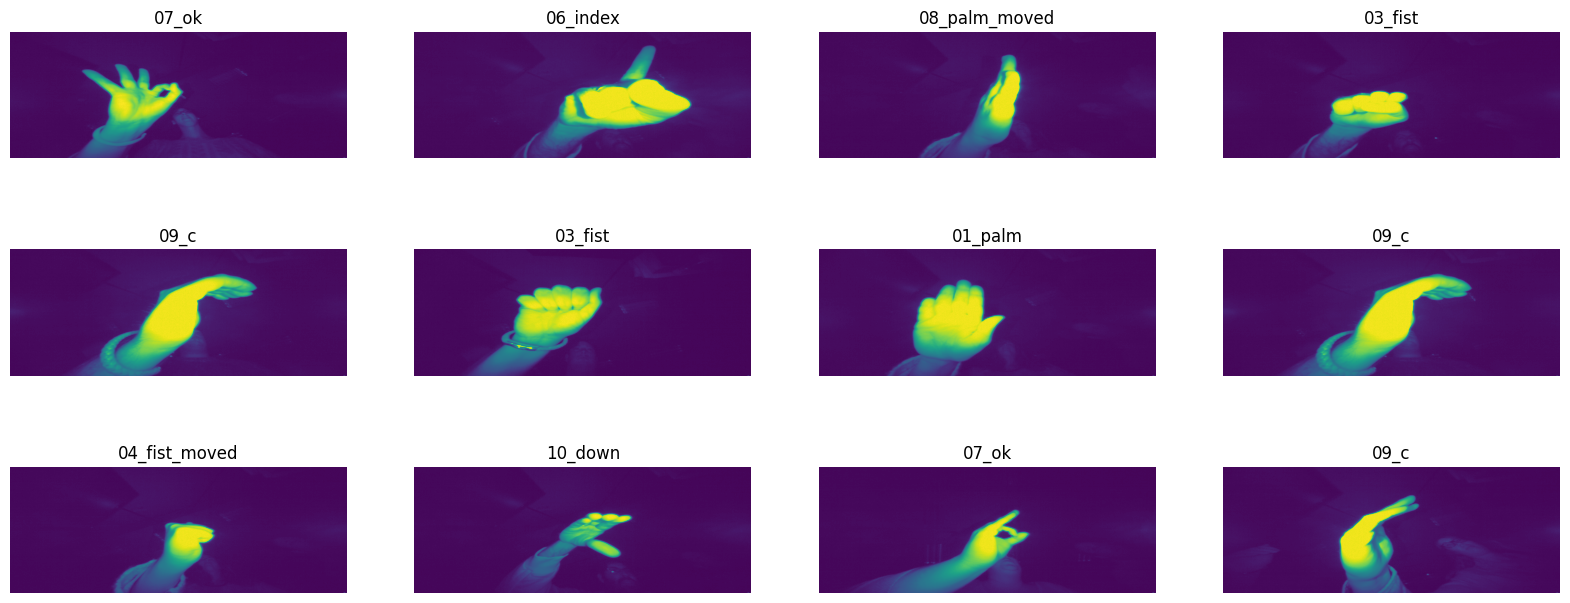

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 111ms/step - accuracy: 0.6661 - loss: 0.9648 - val_accuracy: 0.9958 - val_loss: 0.0166
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9846 - loss: 0.0464 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9992 - val_loss: 0.0028
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.9926 - loss: 0.0221 - val_accuracy: 0.9998 - val_loss: 0.0015
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9951 - loss: 0.0165 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 108ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9992 - val_loss: 0.0039
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 63, 63, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,052,032 (7.83 MB)

 Trainable params: 684,010 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,368,022 (5.22 MB)

Predictions
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9999 - loss: 9.7064e-04
Test Loss: 0.0015339910751208663
Test Accuracy: 0.9998000264167786


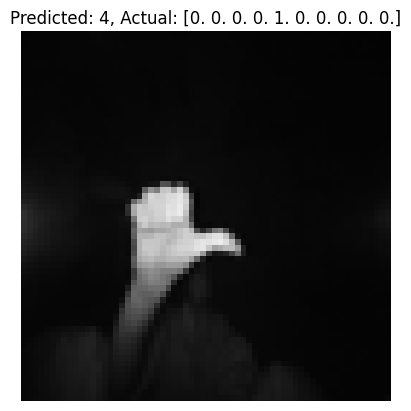

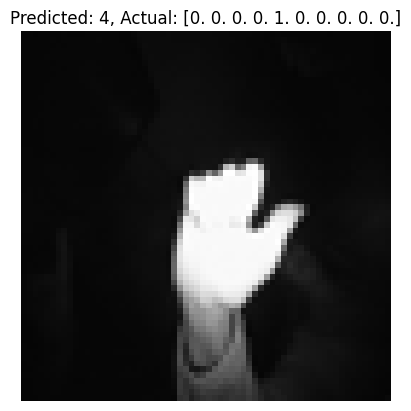

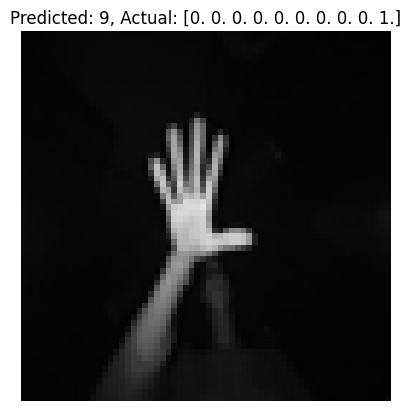

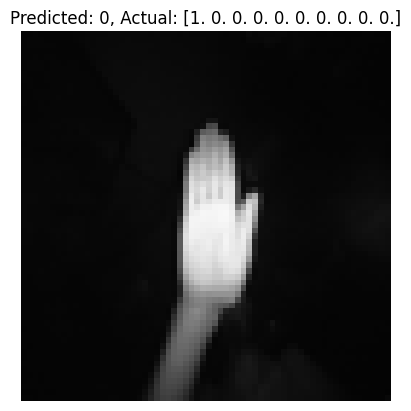

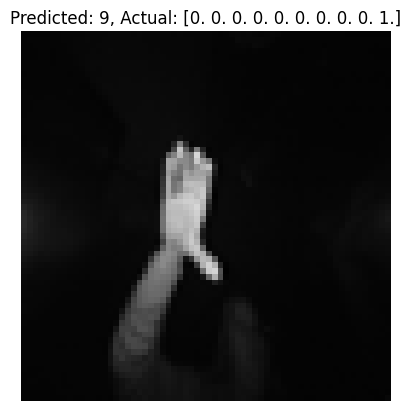

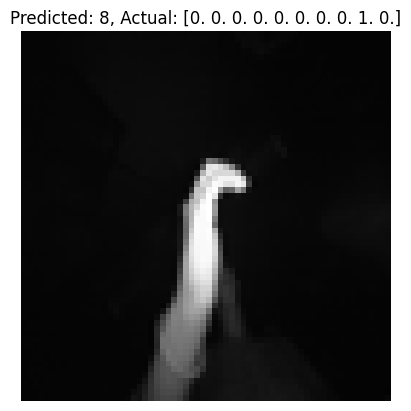

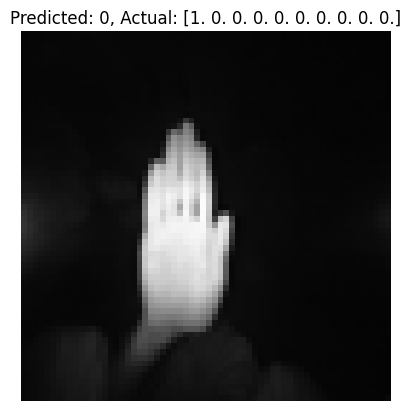

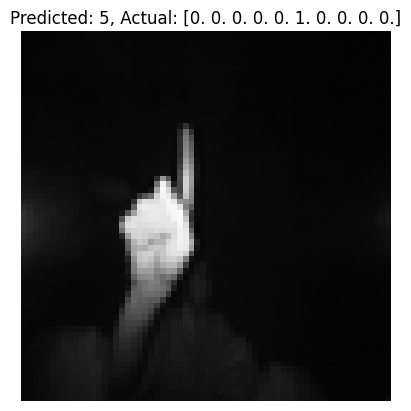

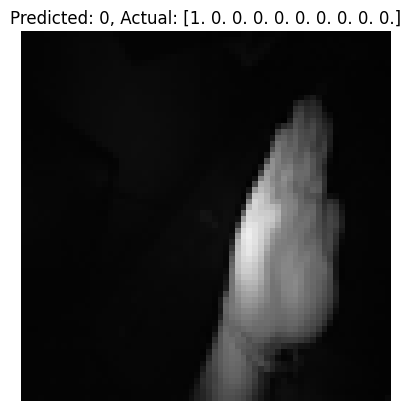

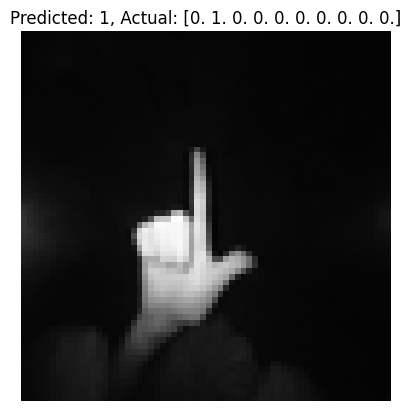

In [3]:
path='/kaggle/input/leapgestrecog/leapGestRecog/'
folders=os.listdir(path)
images = []
labels = []
for folder in folders:
    folder_path = os.path.join(path,folder)
    subfolders = os.listdir(folder_path)
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path,subfolder)
            
        for img in os.listdir(subfolder_path):
            img_path = os.path.join(subfolder_path,img)
            images.append(img_path)
            labels.append(subfolder)

#display random images with their labels             
random_indices = random.sample(range(len(images)),12)
random_imges =  [images[i] for i in random_indices]
random_labels = [labels[i] for i in random_indices]
fig, axes = plt.subplots(3, 4, figsize=(20, 8))
axes = axes.flatten()
for idx,(img,label)  in enumerate(zip(random_imges,random_labels)):
    img=Image.open(img)
    img_array=np.array(img)
    axes[idx].imshow(img_array)
    axes[idx].set_title(label)
    axes[idx].axis('off')
    
plt.show()    
#creat a DataFrame    
df = pd.DataFrame({'images':images,'labels':labels})    
# mapping the labels
le = LabelEncoder()
df['labels'] = le.fit_transform(df['labels'])
x = []
y = np.array(df['labels'])
y=to_categorical(y)
# resize the images
img_size = (64,64)
for i,img in enumerate(df['images']):
    img = Image.open(img)
    img = img.convert('RGB')
    img_resized = img.resize(img_size)
    img_array = np.array(img_resized)
    img_normalized = img_array /255.0
    x.append(img_normalized)
x = np.array(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=54)

model=Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3, 
                               restore_best_weights=True, 
                               verbose=1) 

history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test), 
                    callbacks=[early_stopping])
print("Summary Of The Model")
model.summary()
print("Predictions")
predictions = model.predict(x_test)
predicted_classes =  np.argmax(predictions , axis =1)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

for i in range(10):  
    plt.imshow(x_test[i])  
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

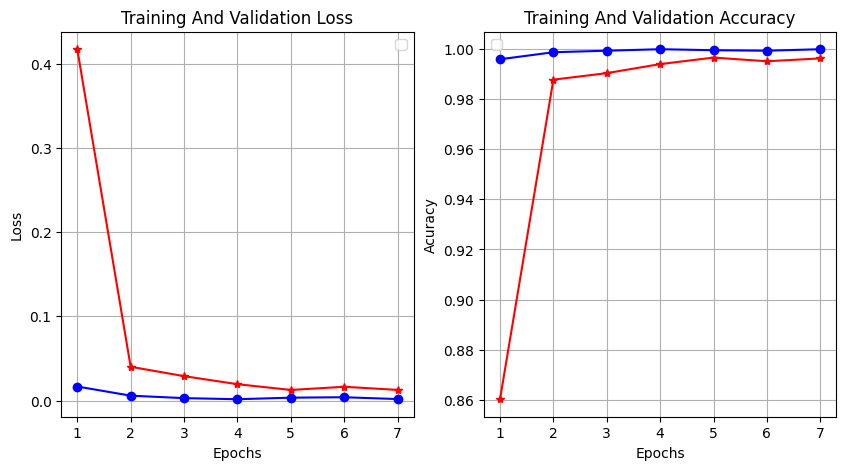

In [4]:
plt.figure(figsize=(10,5))
training_loss = history.history['loss']
trainig_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc=history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs ,training_loss,marker='*',color='red')
plt.plot(epochs ,val_loss,marker='o',color='blue')
plt.title("Training And Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs ,trainig_accuracy,marker='*',color='red')
plt.plot(epochs ,val_acc,marker='o',color='blue')
plt.title("Training And Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuracy")
plt.grid()
plt.legend()

plt.show()